In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
import collections
from collections import Counter
from itertools import chain
import csv
import scipy
from scipy import stats
import statsmodels.api as sm
from pandas.api.types import is_numeric_dtype
from scipy.stats import chi2_contingency
from scipy.stats import wilcoxon

from scipy.stats import norm
import numpy as np

#Opening bank
filename = '/home/valentina/SOFKA_CODIGO/words_bank.csv'
with open(filename, 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    text = list(csv_reader)

#Converting our words bank into pandas dataframe
df =pd.read_csv('/home/valentina/SOFKA_CODIGO/words_bank.csv', names=['Words'], header=None)

In [3]:

#Count consonants
def countConsonants(string):
    num_consonants = 0
    # to count the consonants
    for char in string:
        if char not in "aeiouAEIOU ":
            num_consonants += 1
    return num_consonants

#Count vowels
def countVowels(string):
    num_vowels = 0
    # to count the consonants
    for char in string:
        if char in "aeiouAEIOU ":
            num_vowels += 1
    return num_vowels

#Normal distribution testing
#null hypothesis: x comes from a normal distribution
def normal_test(df):
    
    for i in df.columns:
        if is_numeric_dtype(df[i]):
            k2, p = stats.normaltest(df[i])
            alpha = 0.05
            if p < alpha:
                print("The null hypothesis can be rejected")
                
            else:
                print("The null hypothesis cannot be rejected")


In [4]:
#Getting length, consonants and vowels info
df['Length']=df['Words'].str.len()
df['Consonants'] = df['Words'].apply(countConsonants)
df['Vowels'] = df['Words'].apply(countVowels)
df_short=df[['Length', 'Consonants', 'Vowels']]

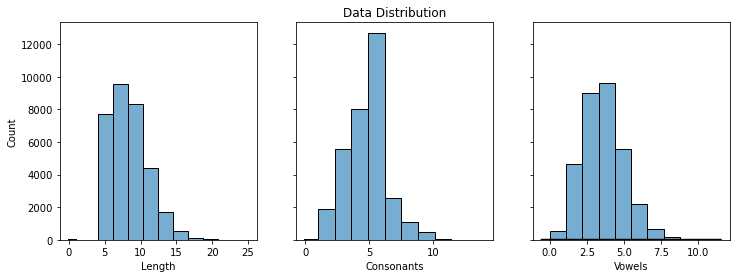

In [5]:
#Plotting histograms
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(12,4), sharey=True)

for pos,cols in enumerate(df_short.columns):
    data = df_short[cols]

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    sns.histplot(data, bins=10,  alpha=0.6, ax=ax[pos])


    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[pos].plot(x, p, 'k', linewidth=2)
    #title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
   
    ax[1].set_title("Data Distribution")


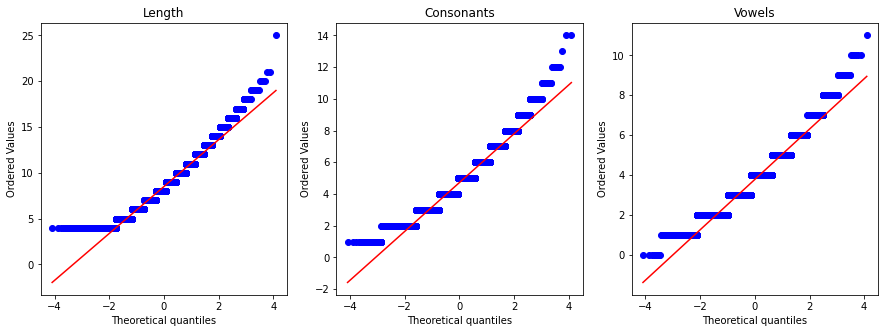

In [6]:
#Q-Q PLOT
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(15,5))
for pos,cols in enumerate(df_short):
   
   stats.probplot(df[cols], fit=True, plot=ax[pos])
   ax[pos].set_title(str(cols))

In [7]:
#Getting the letter-position dataFrame
letters=[]
position=[]

# For each word in the list of accepted words
for word in (df['Words']):
    
    # Convert the words to it's letter-position format
    for pos, letter in enumerate(word):
        letters.append(letter)
        position.append(pos)
        

letters_position = pd.DataFrame(list(zip(letters, position)),
               columns =['Letter', 'Position']).sort_values(by='Letter')


In [8]:
df_letters_position= letters_position.copy()
df_letters_position['Position']= df_letters_position['Position']+1
df_letters_position

,Letter,Position
275736,a,7
50964,a,7
50968,a,11
187408,a,12
50973,a,5
...,...,...
13776,ñ,6
225914,ñ,6
215100,ñ,2
237064,ñ,2


In [9]:
#Converting our letter column in a categorical variable
df_letters_position['Letter Cat'] = np.where((df_letters_position['Letter']== 'a') | (df_letters_position['Letter']== 'e') | 
(df_letters_position['Letter']== 'i') | (df_letters_position['Letter']== 'o') | (df_letters_position['Letter']== 'u'), 'vowel', 'consonant') 



In [10]:
df_letters_position

,Letter,Position,Letter Cat
275736,a,7,vowel
50964,a,7,vowel
50968,a,11,vowel
187408,a,12,vowel
50973,a,5,vowel
...,...,...,...
13776,ñ,6,consonant
225914,ñ,6,consonant
215100,ñ,2,consonant
237064,ñ,2,consonant


Text(0.5, 1.0, 'Boxplots Letter-Position')

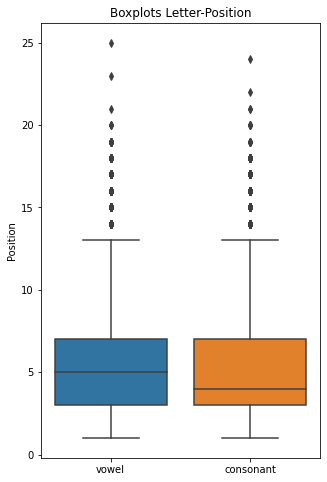

In [11]:
#Boxplots of letter position
plt.figure(figsize=(5, 8))
g=sns.boxplot(x="Letter Cat", y="Position", data=df_letters_position)
_=plt.ylabel('Position')
_=plt.xlabel('')
plt.title("Boxplots Letter-Position")
#g.set_yticks(range(25))
# set the labels

#g.set_yticklabels(list(range(1, 25, 2)))
#plt.savefig('blox_plot_letter_position.png')
#g.set(ylim=(1, 36))

In [12]:
cons_pos =df_letters_position[['Position', 'Letter Cat']][df_letters_position['Letter Cat']=='consonant']['Position']
vows_pos =df_letters_position[['Position', 'Letter Cat']][df_letters_position['Letter Cat']=='vowel']['Position']

In [13]:
# finding the 1st quartile
q1 = np.quantile(vows_pos, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(vows_pos, 0.75)
med = np.median(vows_pos)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

4.0 13.0 -3.0


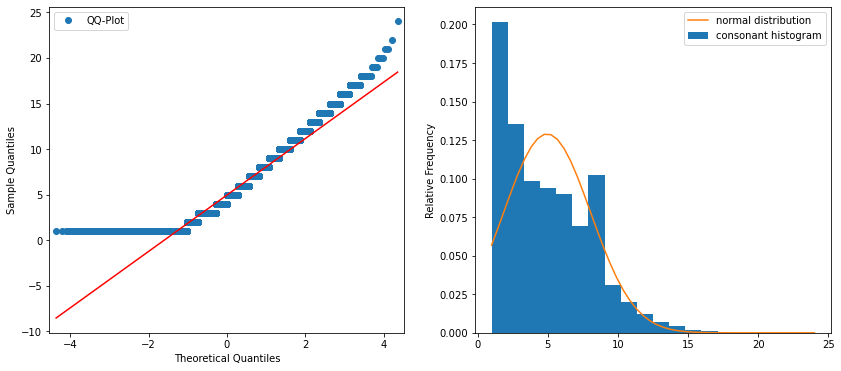

In [14]:
import statistics
plt.subplots(nrows=1,ncols=2, figsize = (14,6))
ax = plt.subplot(1,2,1)
sm.qqplot(cons_pos,line='s', ax= ax, label = 'QQ-Plot')
#sns.rugplot(y = cons_data, ax= ax, color = "green", label = 'outliers')
#ax.set_ylabel('Residuals')
_=ax.legend()

ax = plt.subplot(1,2,2)
plt.hist(cons_pos, density = True, bins = 20, label = 'consonant histogram')
mean = statistics.mean(cons_pos)
sd = statistics.stdev(cons_pos)
y = np.linspace(cons_pos.min(), cons_pos.max())
plt.plot(y, scipy.stats.norm.pdf(y, mean, sd),label="normal distribution")
#sns.rugplot(cons_data, color = "green", label = "outliers", ax= ax)
#ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')
#ax.set_ylim(0, 0.25)
ax.legend()
plt.savefig('consonanthist.png')

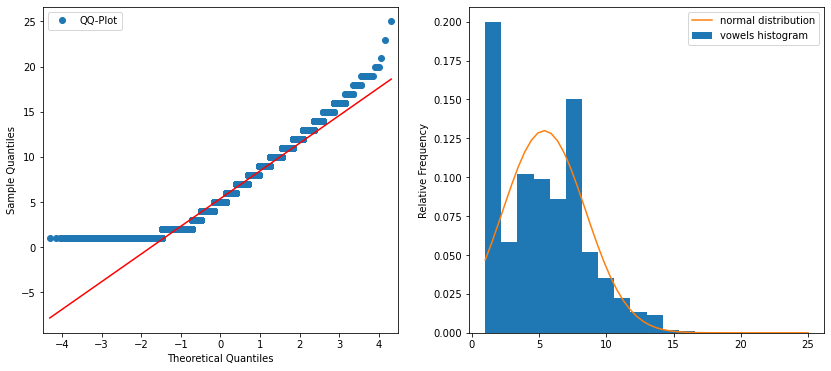

In [15]:
import statistics
plt.subplots(nrows=1,ncols=2, figsize = (14,6))
ax = plt.subplot(1,2,1)
sm.qqplot(vows_pos,line='s', ax= ax, label = 'QQ-Plot')
#sns.rugplot(y = cons_data, ax= ax, color = "green", label = 'outliers')
#ax.set_ylabel('Residuals')
_=ax.legend()

ax = plt.subplot(1,2,2)
plt.hist(vows_pos, density = True, bins = 20, label = 'vowels histogram')
mean = statistics.mean(vows_pos)
sd = statistics.stdev(vows_pos)
y = np.linspace(vows_pos.min(), vows_pos.max())
plt.plot(y, scipy.stats.norm.pdf(y, mean, sd),label="normal distribution")
#sns.rugplot(cons_data, color = "green", label = "outliers", ax= ax)
#ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')
#ax.set_ylim(0, 0.25)
ax.legend()
plt.savefig('vowelshist.png')

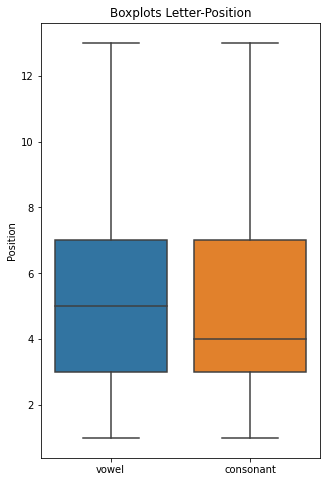

In [21]:
df_letters_position_out =df_letters_position[['Position', 'Letter Cat']][df_letters_position['Position']<14]

#Boxplots of letter position
plt.figure(figsize=(5, 8))
g=sns.boxplot(x="Letter Cat", y="Position", data=df_letters_position_out)
_=plt.ylabel('Position')
_=plt.xlabel('')
plt.title("Boxplots Letter-Position")
plt.savefig('boxplots_withoutoutlayers.png')

In [17]:
cons_pos_out =df_letters_position_out[['Position', 'Letter Cat']][df_letters_position_out['Letter Cat']=='consonant']['Position']
vows_pos_out =df_letters_position_out[['Position', 'Letter Cat']][df_letters_position_out['Letter Cat']=='vowel']['Position']

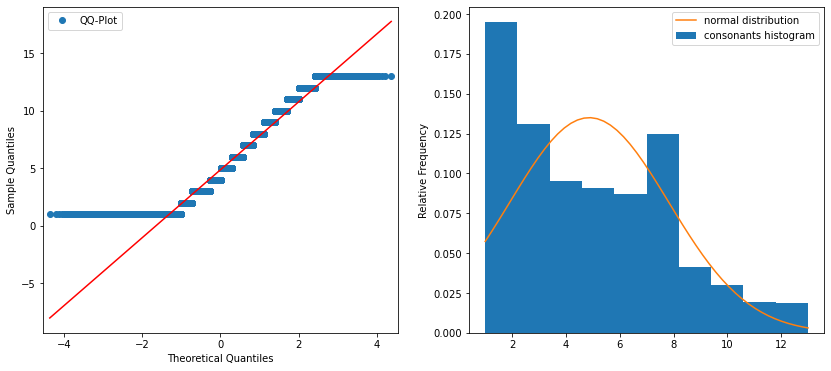

In [22]:
import statistics
plt.subplots(nrows=1,ncols=2, figsize = (14,6))
ax = plt.subplot(1,2,1)
sm.qqplot(cons_pos_out,line='s', ax= ax, label = 'QQ-Plot')
#sns.rugplot(y = cons_data, ax= ax, color = "green", label = 'outliers')
#ax.set_ylabel('Residuals')
_=ax.legend()

ax = plt.subplot(1,2,2)
plt.hist(cons_pos_out, density = True, bins = 10, label = 'consonants histogram')
mean = statistics.mean(cons_pos_out)
sd = statistics.stdev(cons_pos_out)
y = np.linspace(cons_pos_out.min(), cons_pos_out.max())
plt.plot(y, scipy.stats.norm.pdf(y, mean, sd),label="normal distribution")
#sns.rugplot(cons_data, color = "green", label = "outliers", ax= ax)
#ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')
#ax.set_ylim(0, 0.25)
ax.legend()
plt.savefig('constshist_withoutoutlayers.png')

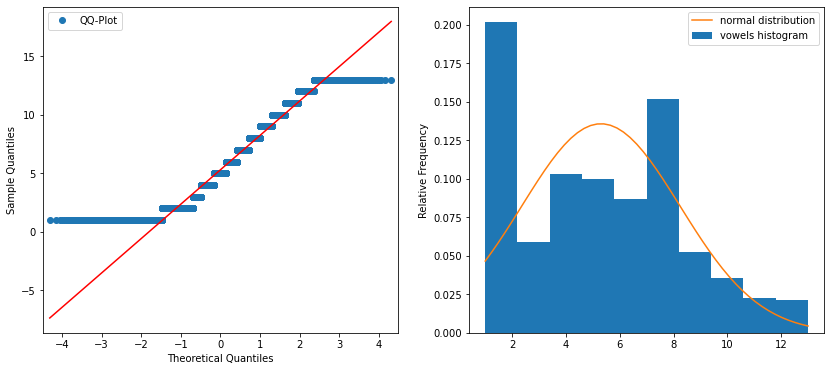

In [23]:
import statistics
plt.subplots(nrows=1,ncols=2, figsize = (14,6))
ax = plt.subplot(1,2,1)
sm.qqplot(vows_pos_out,line='s', ax= ax, label = 'QQ-Plot')
#sns.rugplot(y = cons_data, ax= ax, color = "green", label = 'outliers')
#ax.set_ylabel('Residuals')
_=ax.legend()

ax = plt.subplot(1,2,2)
plt.hist(vows_pos_out, density = True, bins = 10, label = 'vowels histogram')
mean = statistics.mean(vows_pos_out)
sd = statistics.stdev(vows_pos_out)
y = np.linspace(vows_pos_out.min(), vows_pos_out.max())
plt.plot(y, scipy.stats.norm.pdf(y, mean, sd),label="normal distribution")
#sns.rugplot(cons_data, color = "green", label = "outliers", ax= ax)
#ax.set_xlabel('Residuals')
ax.set_ylabel('Relative Frequency')
#ax.set_ylim(0, 0.25)
ax.legend()
plt.savefig('vowelsshist_withoutoutlayers.png')

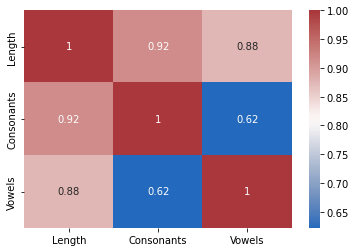

In [33]:
sns.heatmap(df_short.corr(method='spearman'), annot=True, cmap="vlag")
plt.savefig('relationship.png')

<AxesSubplot:>

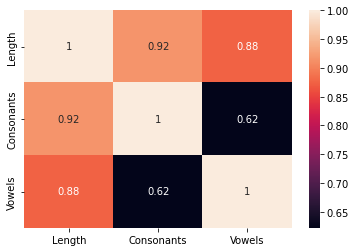

In [28]:
sns.heatmap(df_short.corr(method='spearman'), annot=True)

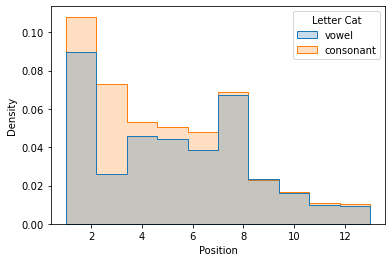

In [56]:
#Vowels and consonant histogram
sns.histplot(df_letters_position_out, x="Position", hue="Letter Cat", element="step", bins=10, stat='density')
plt.savefig('dist.png')

In [37]:
#Getting each-letter df
df = {}

for pos, name in enumerate(df_letters_position['Letter'].unique()):

    letters = df_letters_position['Letter'].unique()
    df[name] = df_letters_position.loc[df_letters_position['Letter'] == letters[pos]]

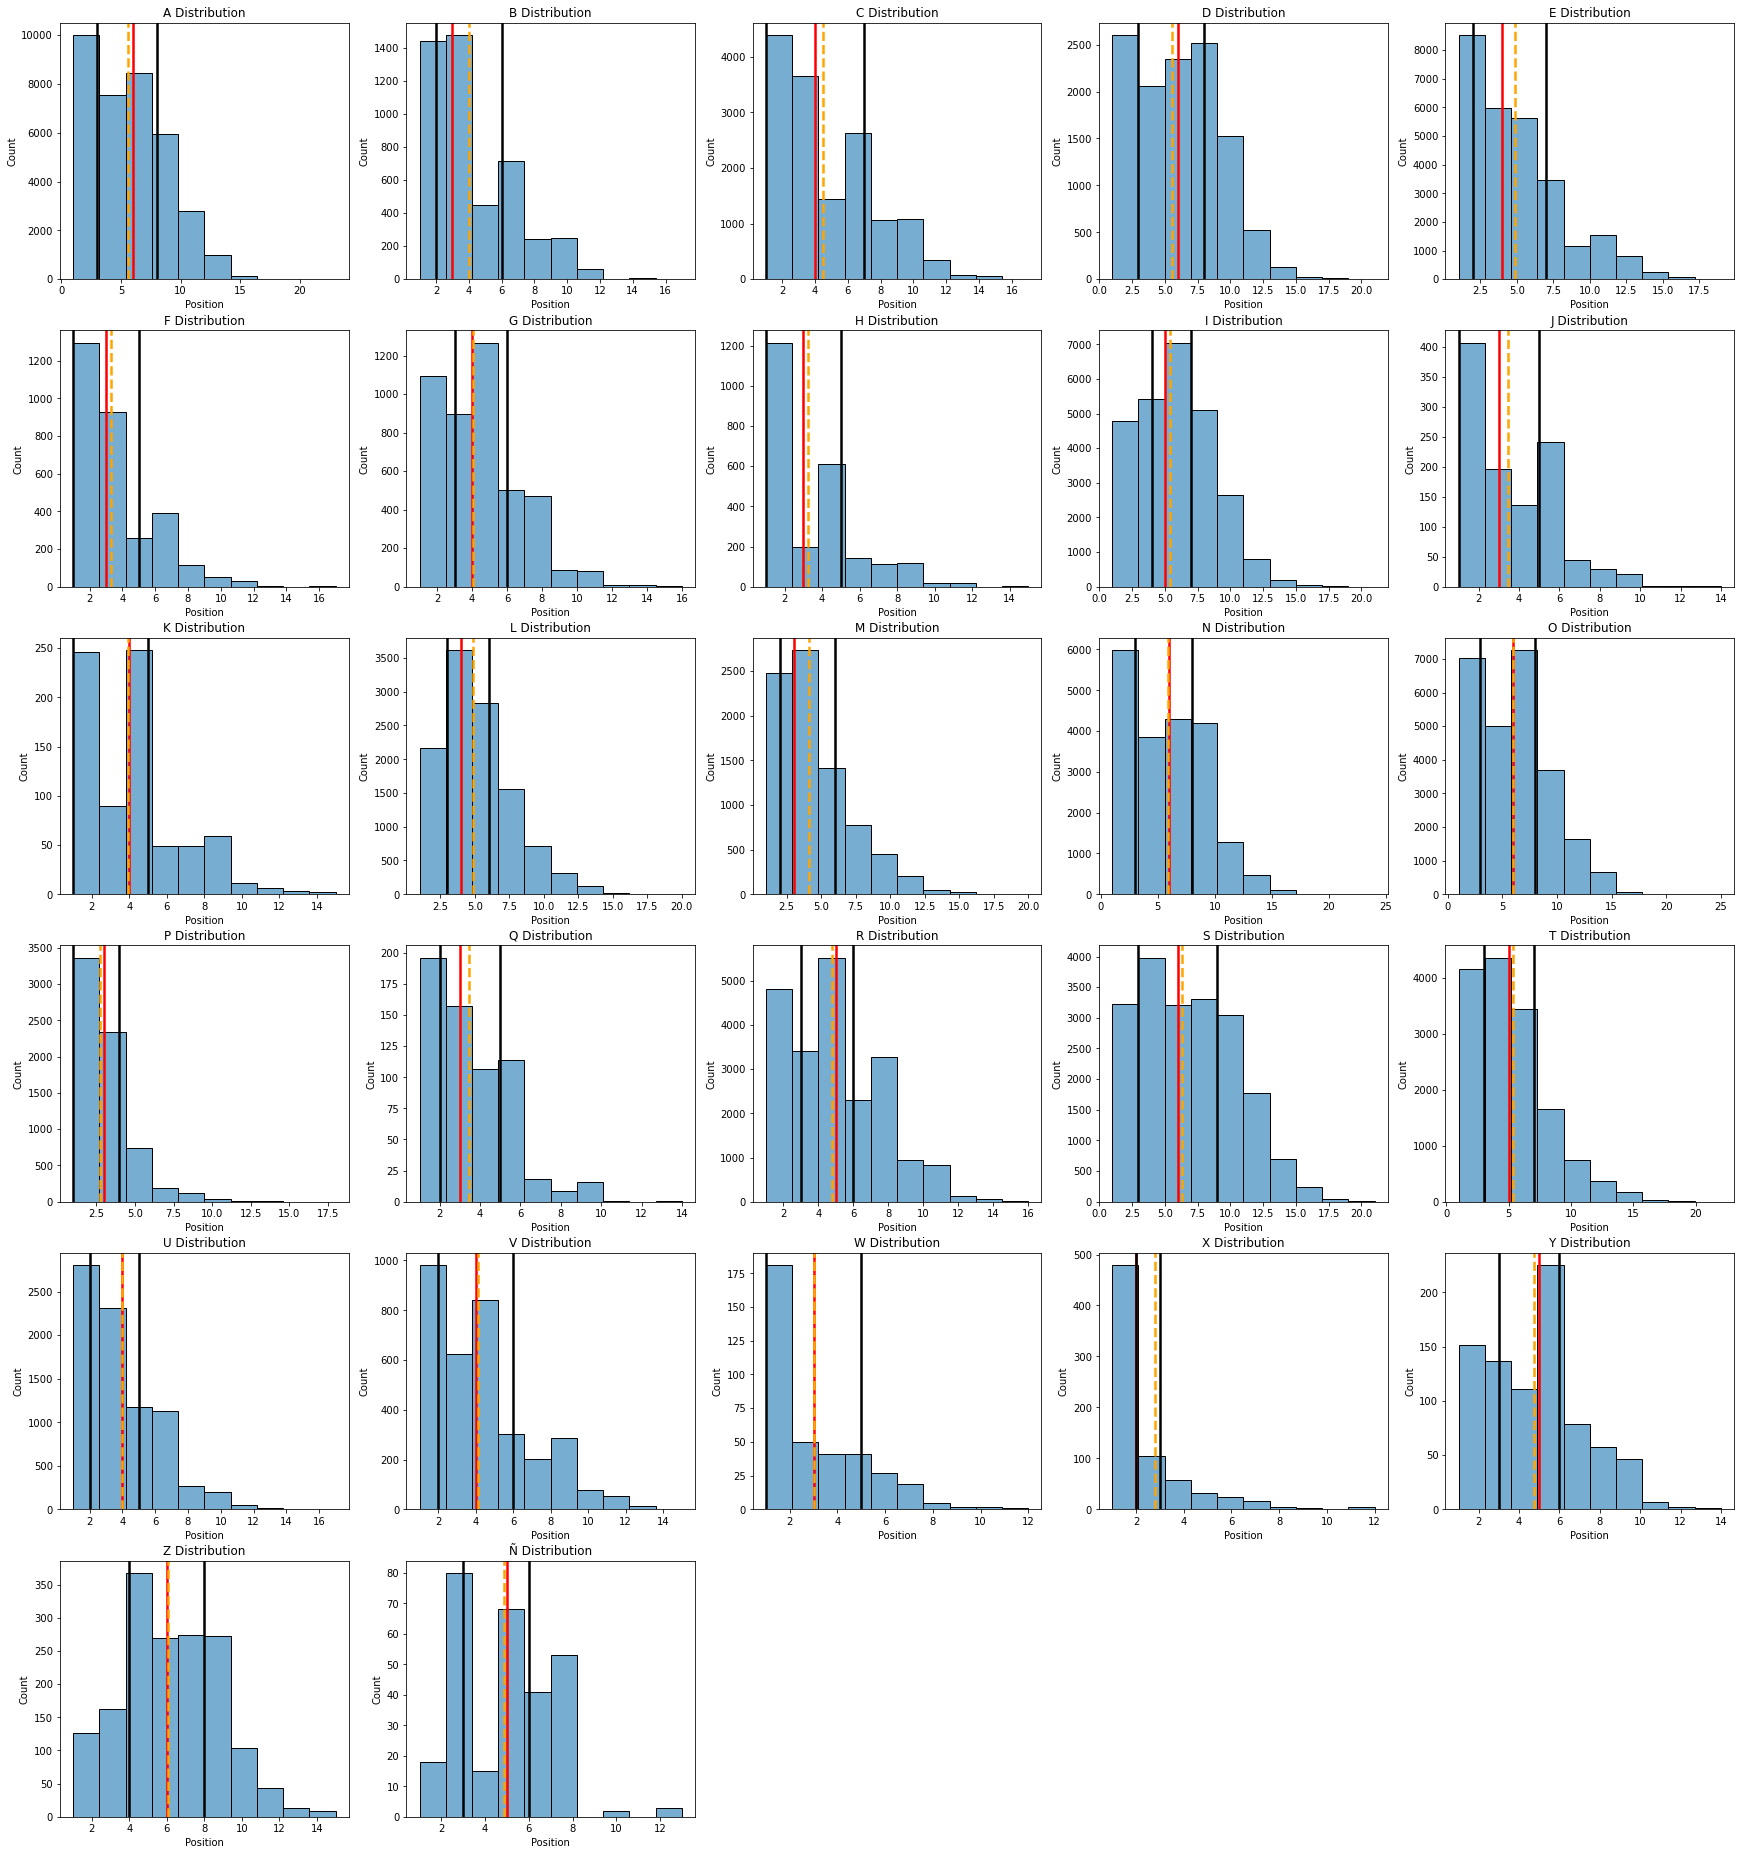

In [45]:
fig =plt.figure(figsize=(30,33))
columns = 5
rows = 6
for i, j in enumerate(df_letters_position['Letter'].unique()):
    data= df[j].Position
    ax= fig.add_subplot(rows, columns, i+1)
    #stats.probplot(df[j].Position, fit=True, plot=ax)
    sns.histplot(data, bins=10,  alpha=0.6,  ax=ax)
    ax.set_title(str(j).upper()+ ' Distribution')
    ax.axvline(x=data.median(), c='red', ls='-', lw=2.5, label = 'median')
    ax.axvline(x=data.quantile(0.25), c='black', ls='-', lw=2.5, label = 'q25')
    ax.axvline(x=data.quantile(0.75), c='black', ls='-', lw=2.5, label = 'q75')
    ax.axvline(x=data.mean(), c='orange', ls='--', lw=2.5, label = 'mean')

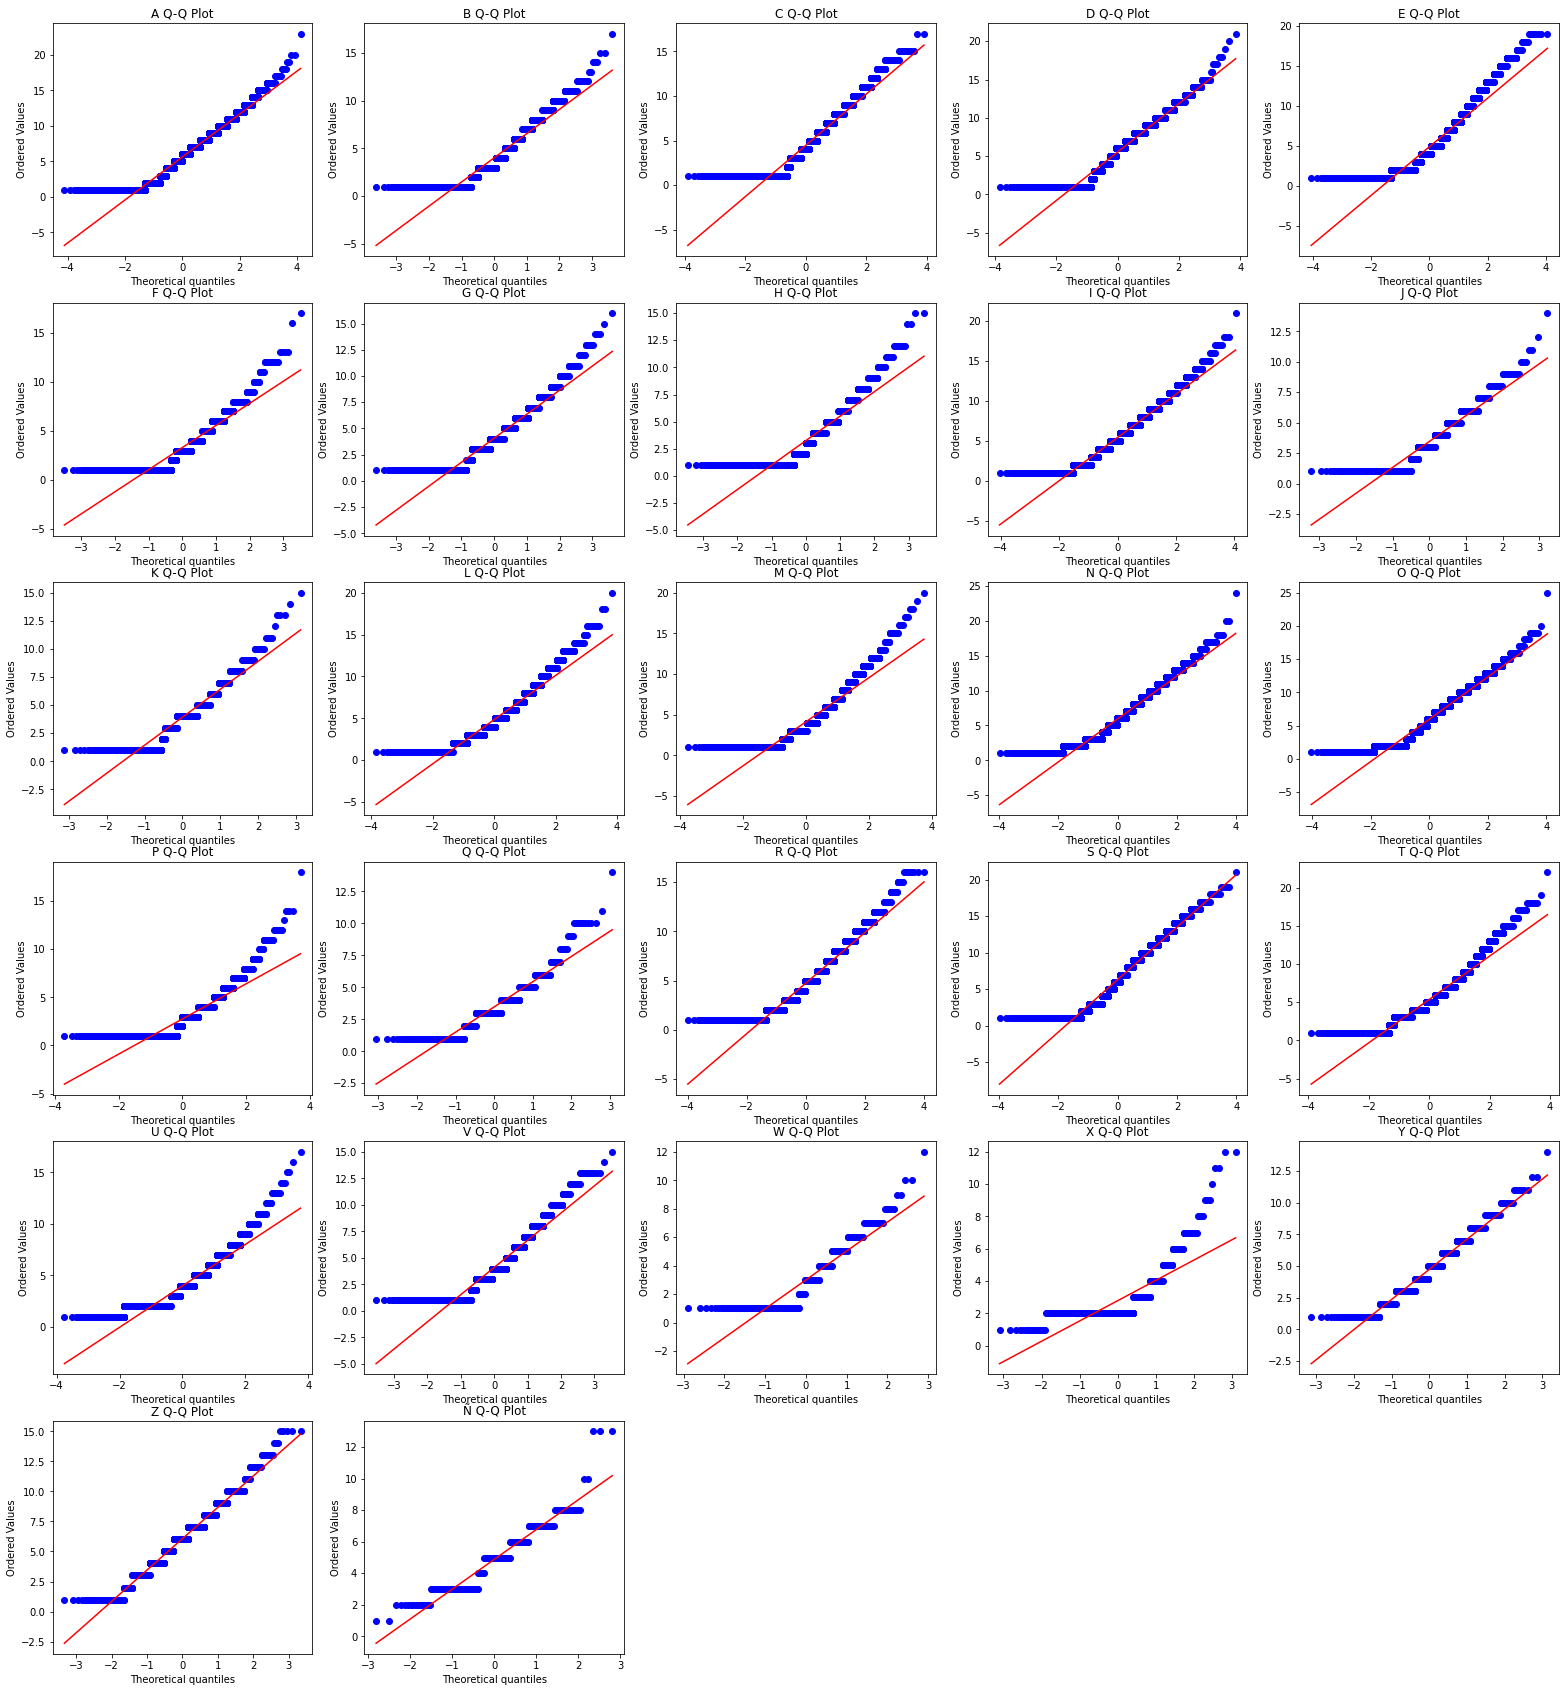

In [41]:
#Consonants Q-Q PLOT.

fig =plt.figure(figsize=(27,30))
columns = 5
rows = 6
for i, j in enumerate (df_letters_position['Letter'].unique()):
    ax= fig.add_subplot(rows, columns, i+1)
    stats.probplot(df[j].Position, fit=True, plot=ax)
    ax.set_title(str(j).upper()+ ' Q-Q Plot')

In [50]:
#The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y.

from scipy.stats import mannwhitneyu

#en cualquiero posicion puede estar una vocal o consonante. Hay preferencia en determinadas posiciones de vocales o consonantes

mannwhitneyu(cons_pos_out, vows_pos_out)

MannwhitneyuResult(statistic=8395589870.0, pvalue=0.0)